# **KNN Assignment**

# **Assignment 13(b)**

# ***2.Zoo dataset (Zoo.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
zoo=pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# **Exploratory Data Analysis**

In [3]:
zoo.shape

(101, 18)

In [4]:
#checking missing values
(zoo.isna().sum())/len(zoo)*100

animal name    0.0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
type           0.0
dtype: float64

In [5]:
zoo.isna().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

In [6]:
#checking duplicates
zoo[zoo.duplicated()].shape

(0, 18)

In [7]:
zoo.duplicated().sum()

0

In [8]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [9]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
zoo['animal name'].nunique()

100

In [12]:
zoo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [13]:
zoo['type'].nunique()

7

In [14]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [15]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [16]:
zoo['animal name'].astype('category')

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: category
Categories (100, object): ['aardvark', 'antelope', 'bass', 'bear', ..., 'wasp', 'wolf', 'worm', 'wren']

# **Correlation**

In [17]:
#correlation
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


# **Visualization**

# **Heatmap**

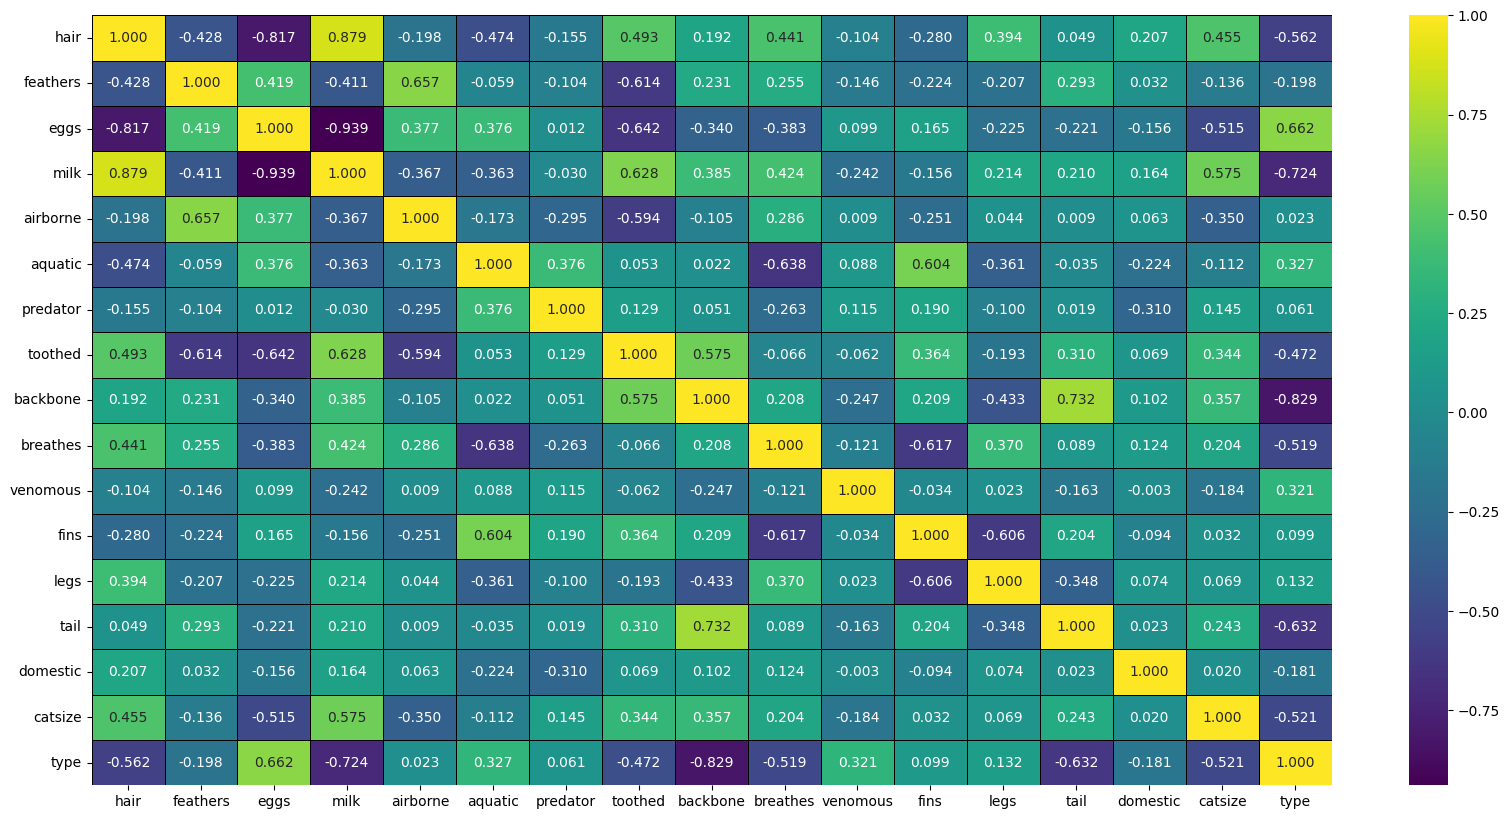

In [18]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(zoo.corr(),annot=True,cmap='viridis',fmt='.3f',linewidth=0.5,linecolor='black')
plt.show()

# **PairPlot**

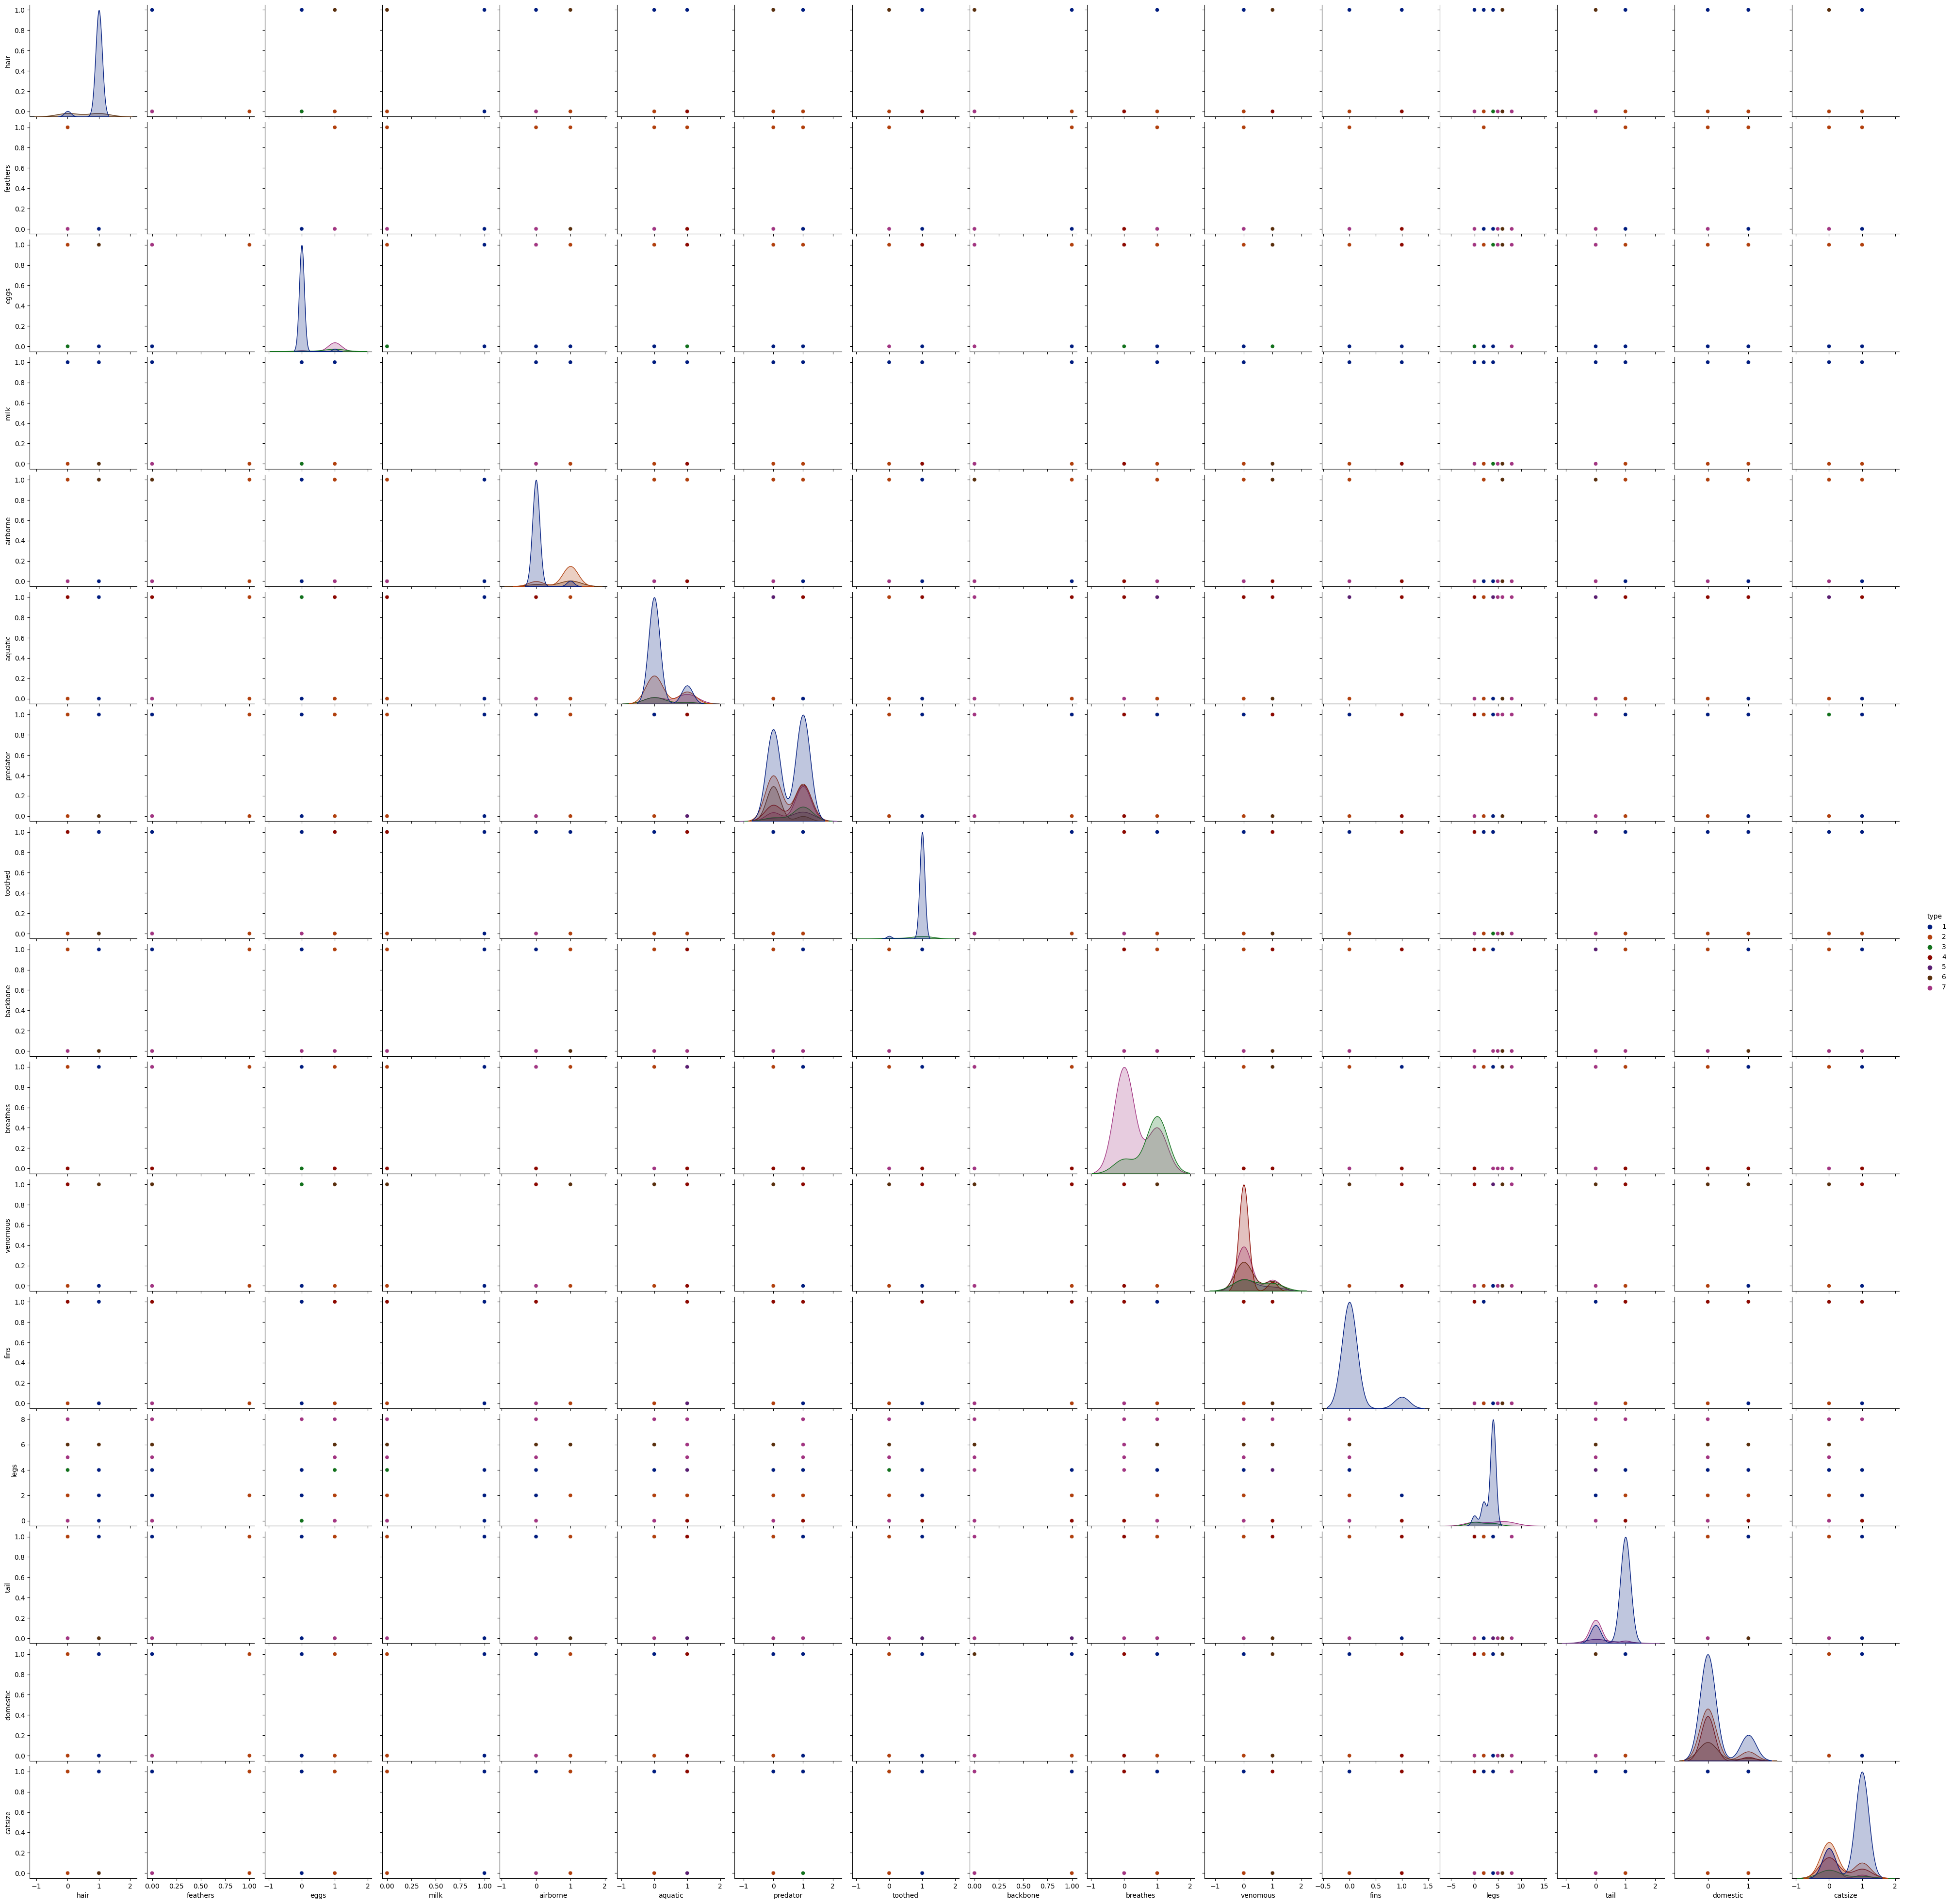

In [19]:
#pairplot
sns.pairplot(zoo,hue='type',palette='dark')
plt.show()

# **Histogram**

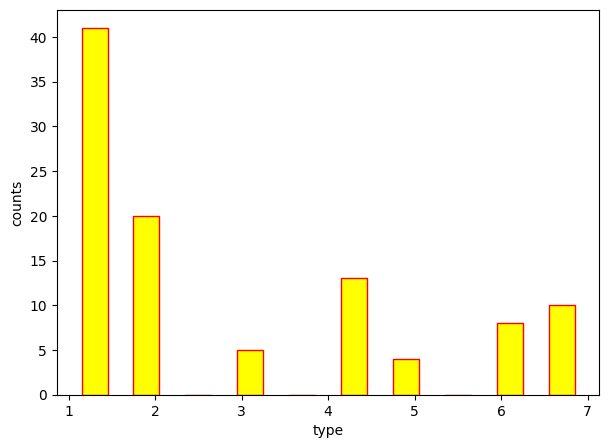

In [20]:
#histogram
plt.figure(figsize=(7,5))
plt.hist(zoo['type'],color='yellow',edgecolor='red',rwidth=0.5)
plt.xlabel('type')
plt.ylabel('counts')
plt.show()

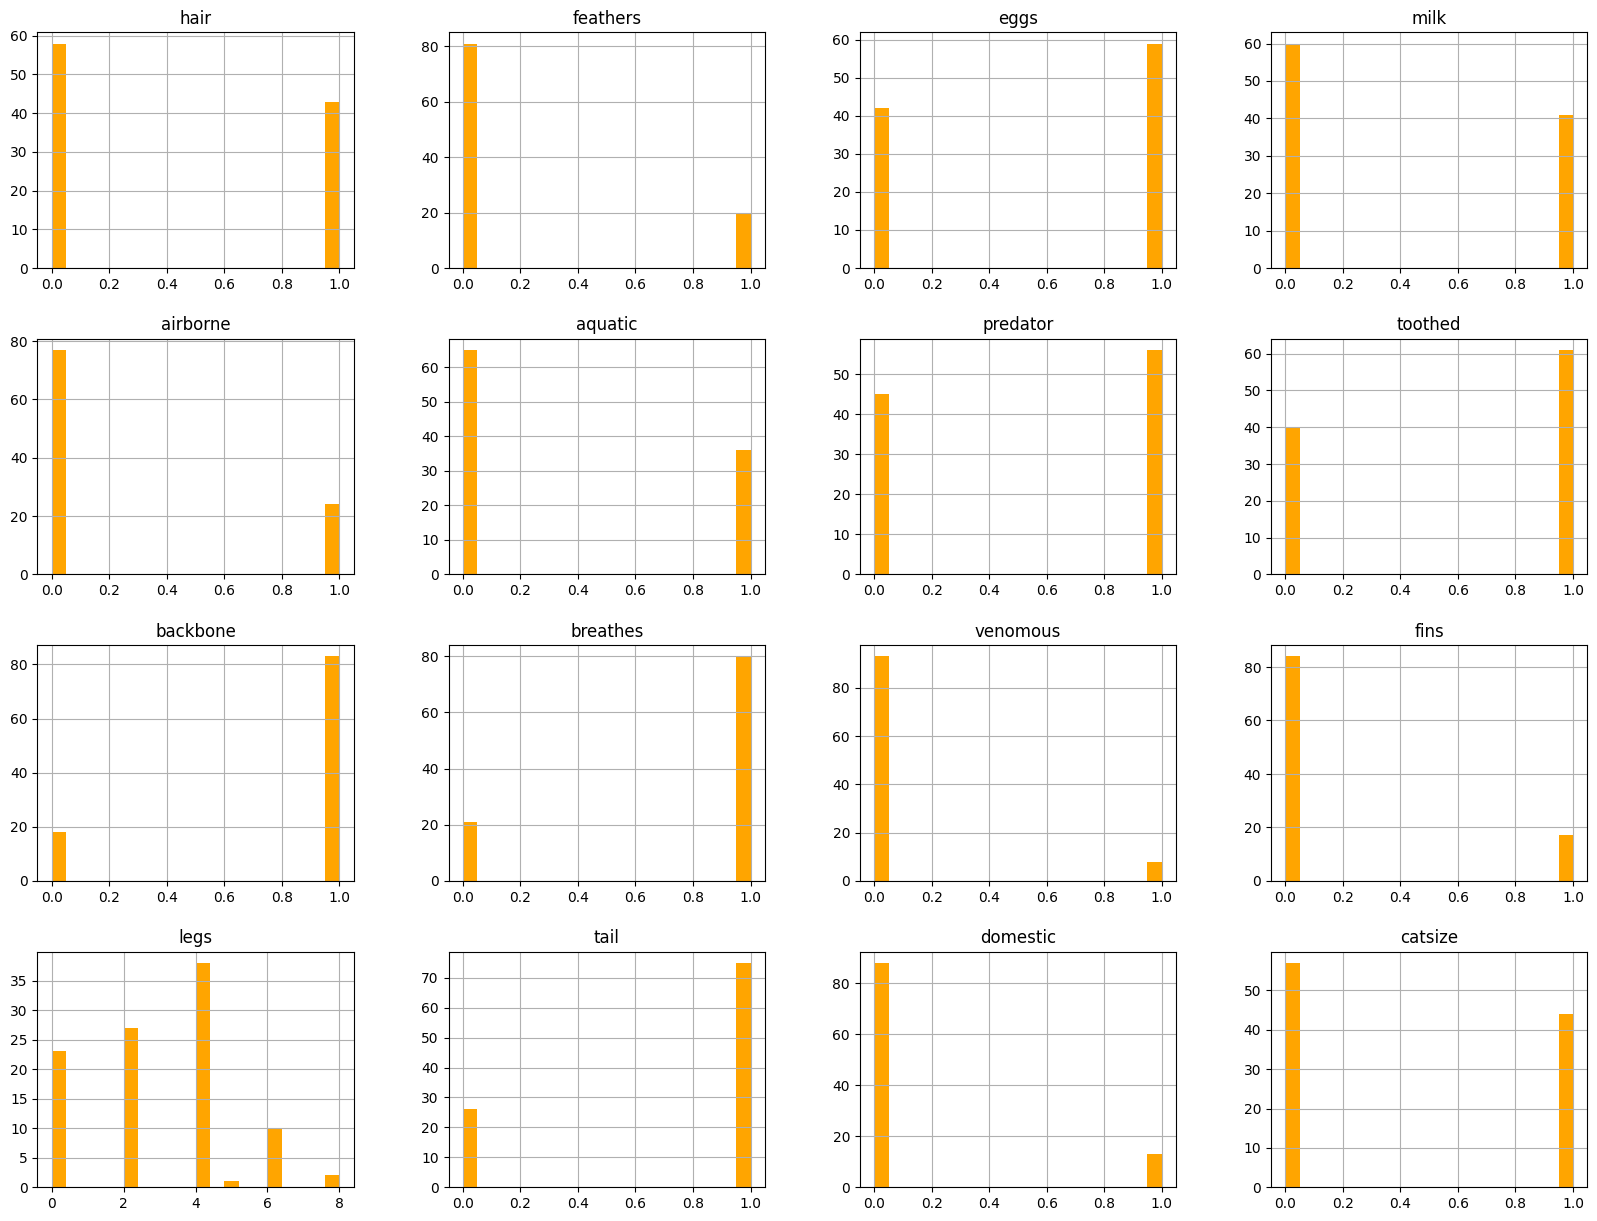

In [21]:
#histgram
zoo.iloc[:,1:-1].hist(bins=20,figsize=(20,15),color='orange')
plt.show()

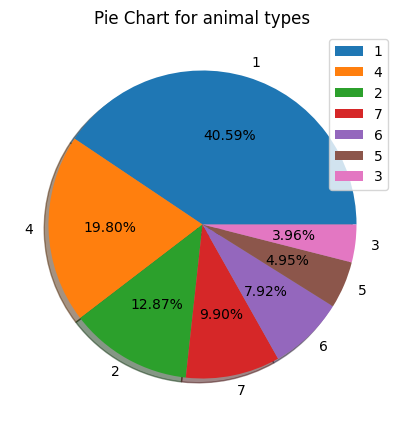

In [22]:
#pie plot
plt.figure(figsize=(5,5))
plt.pie(zoo['type'].value_counts(),labels=zoo['type'].unique(),autopct='%.2f%%',shadow=True)
plt.legend()
plt.title('Pie Chart for animal types')
plt.show()

# **Density Plot**

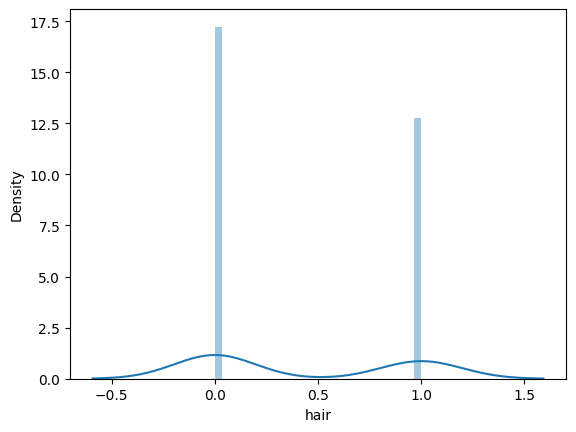

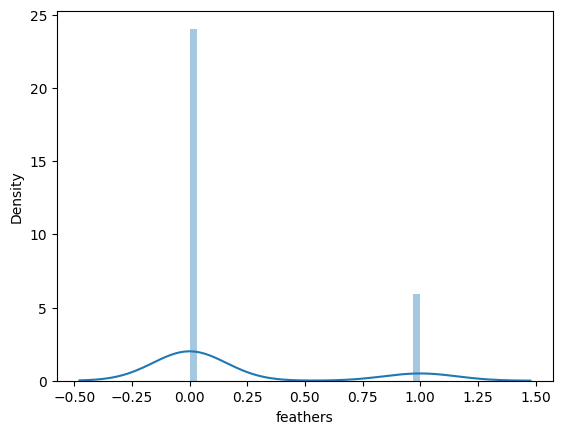

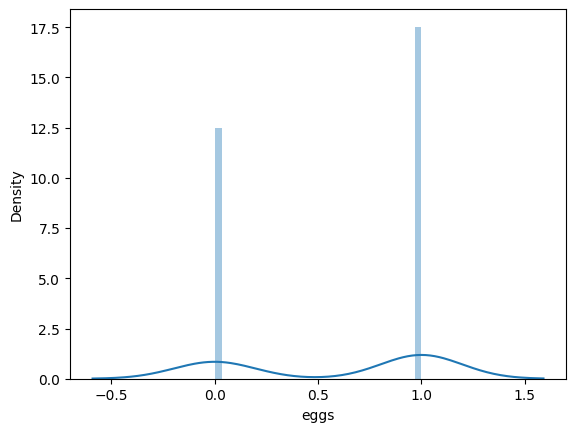

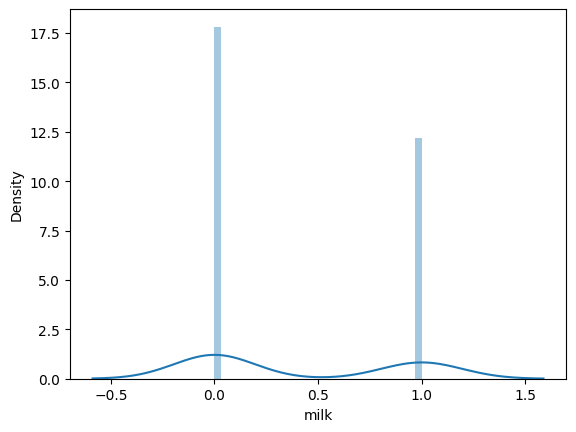

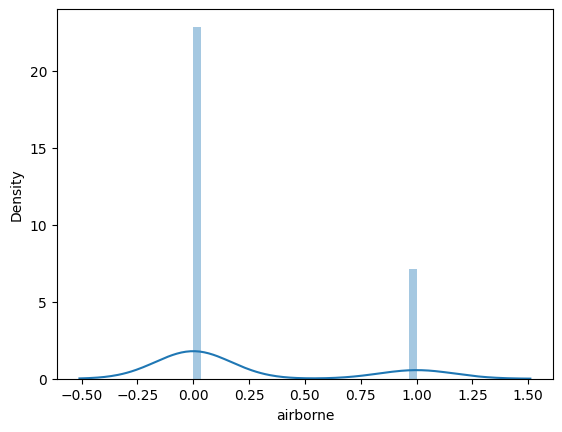

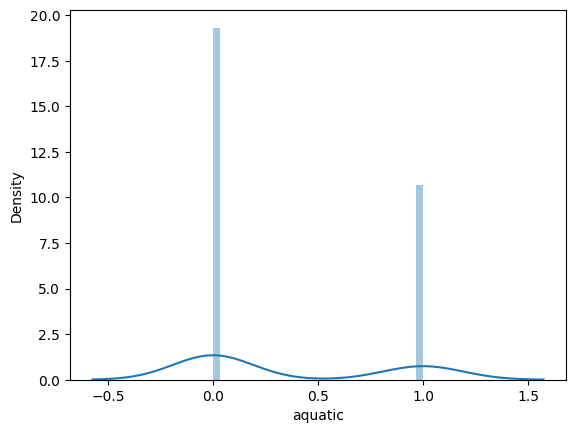

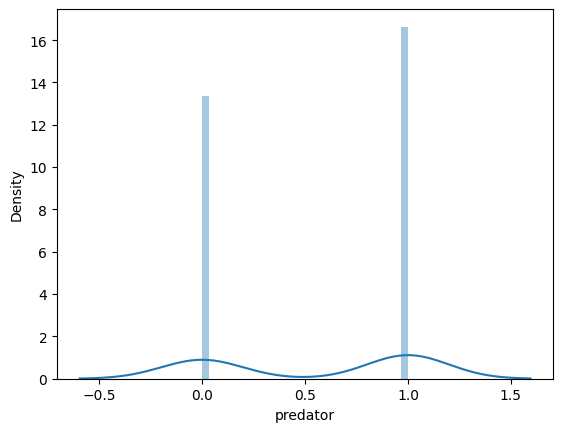

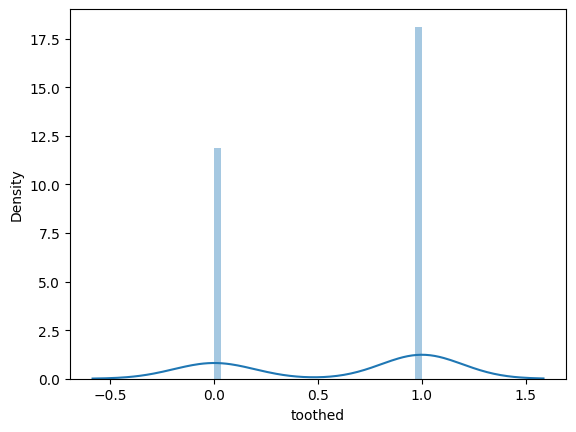

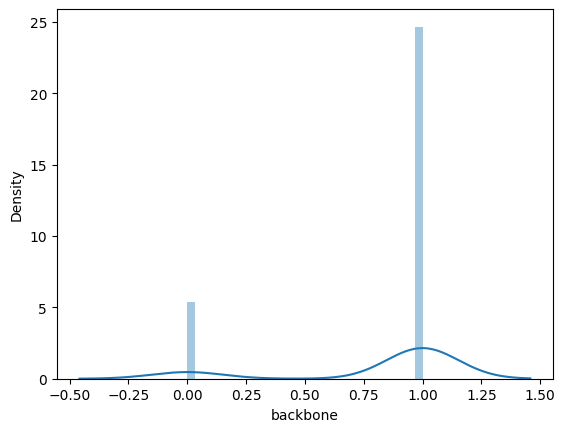

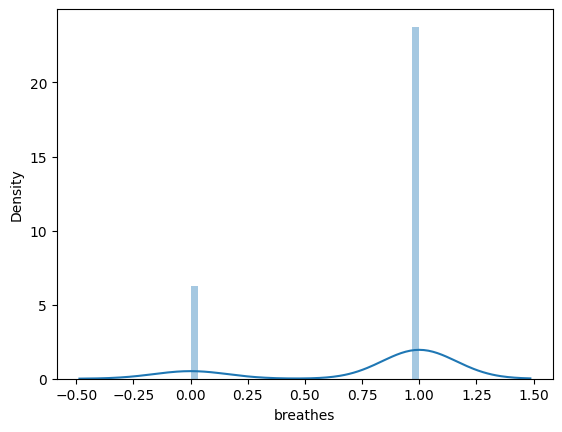

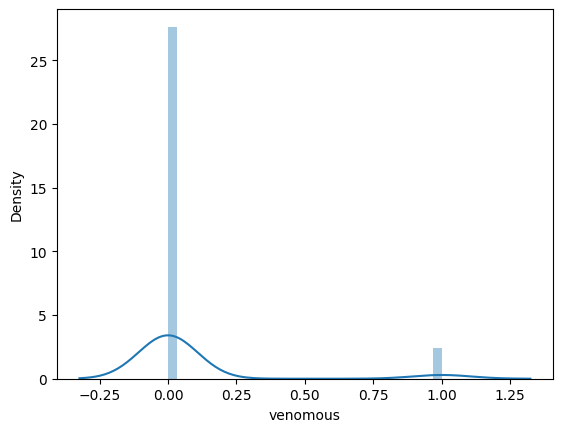

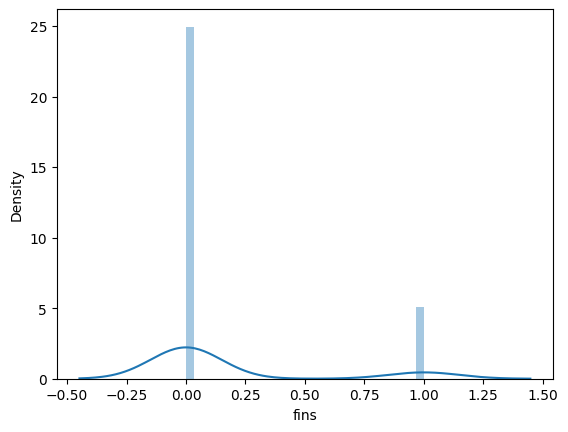

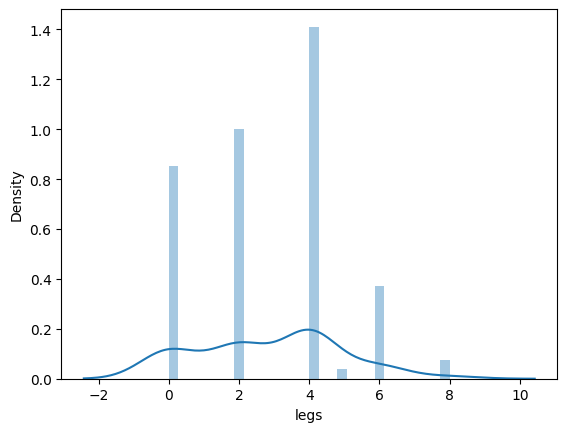

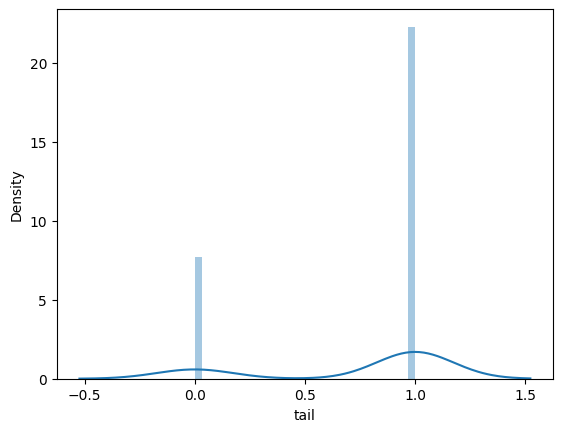

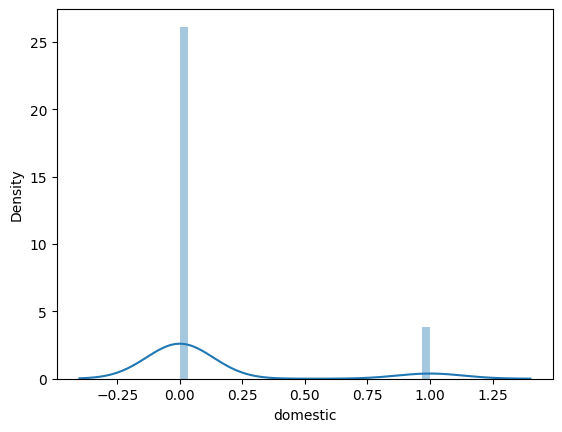

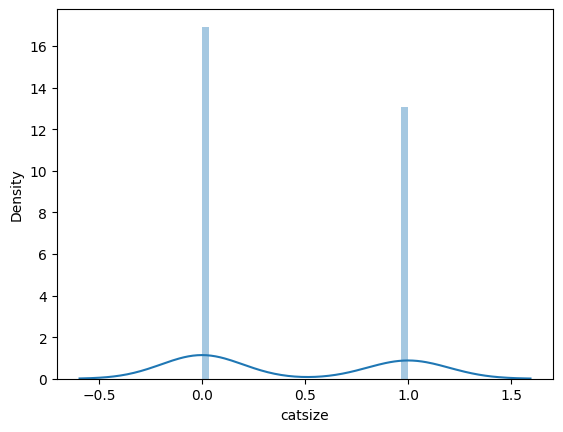

In [23]:
#distplot
feat=zoo.columns[1:-1]
for f in feat:
  sns.distplot(zoo[f],bins=30)
  plt.show()

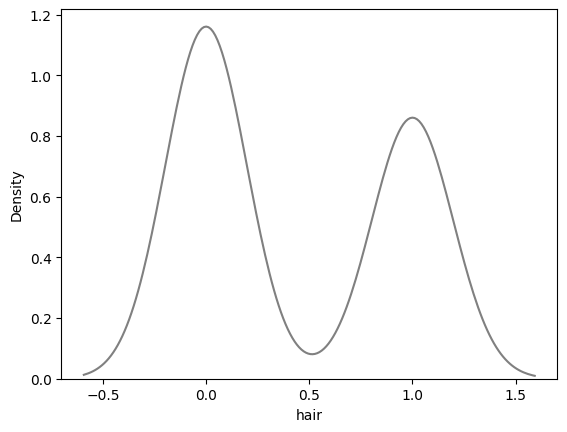

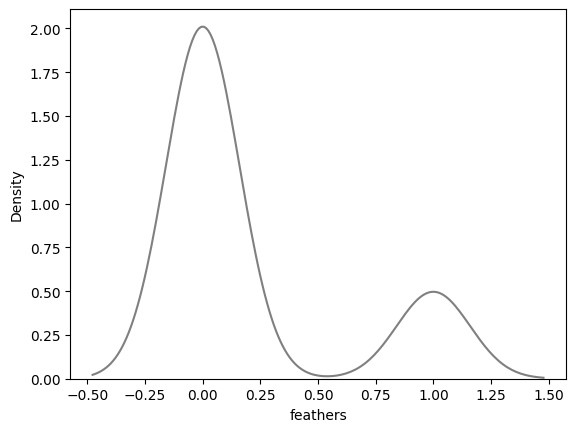

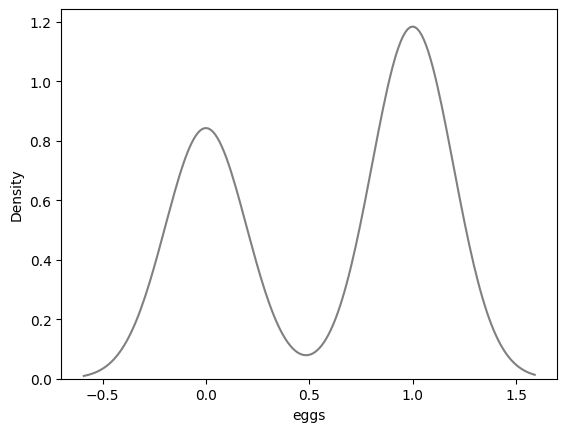

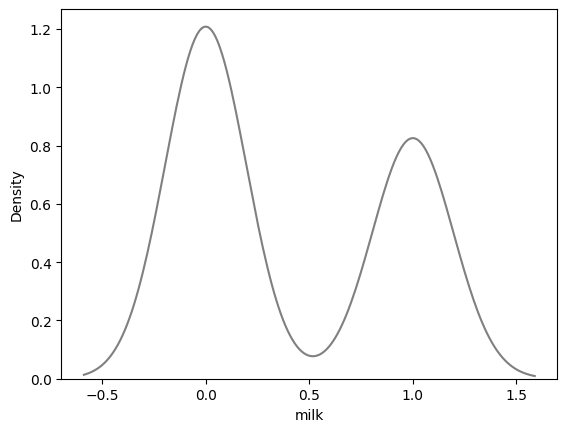

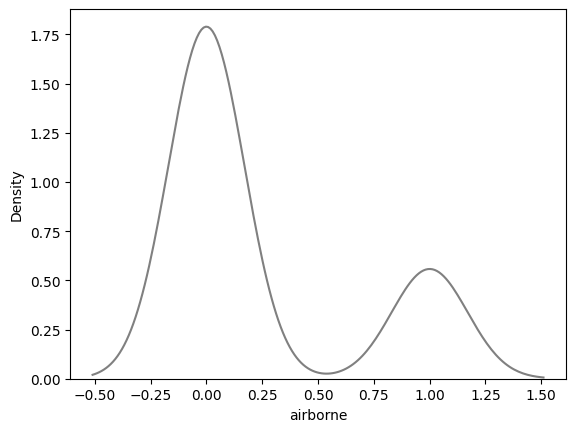

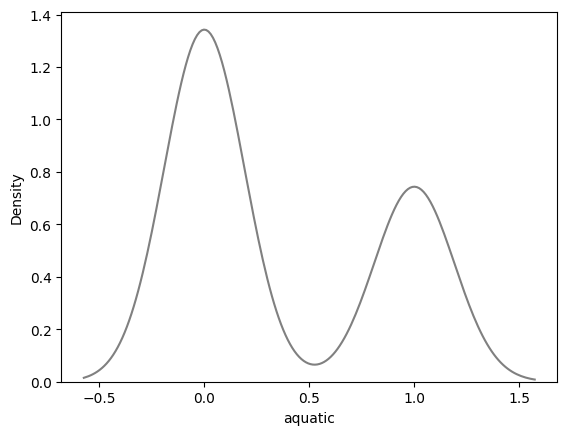

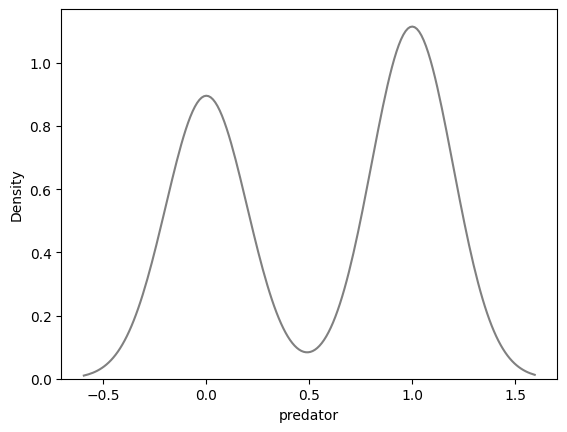

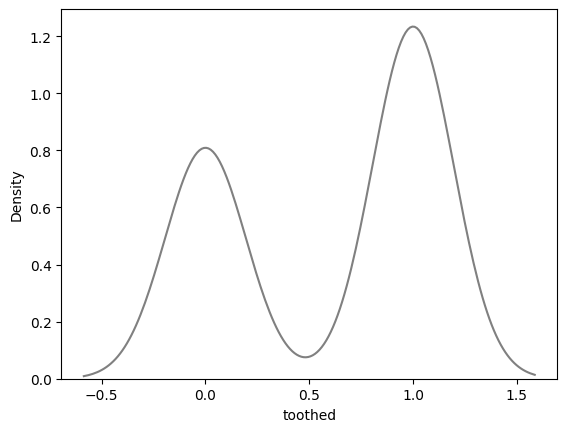

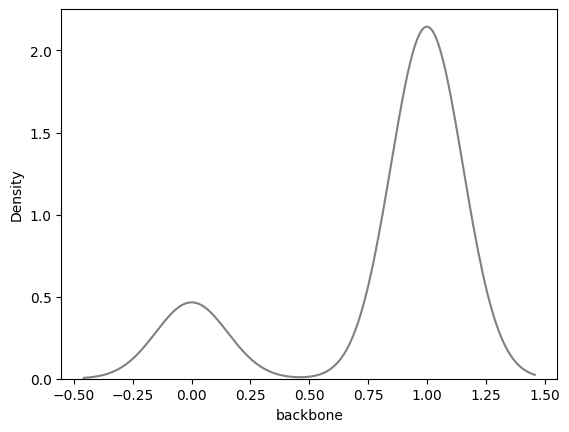

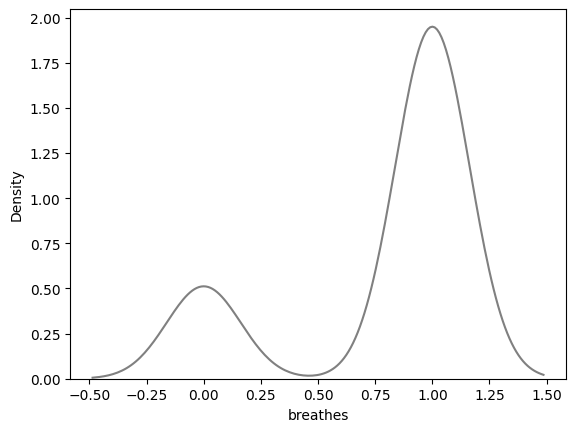

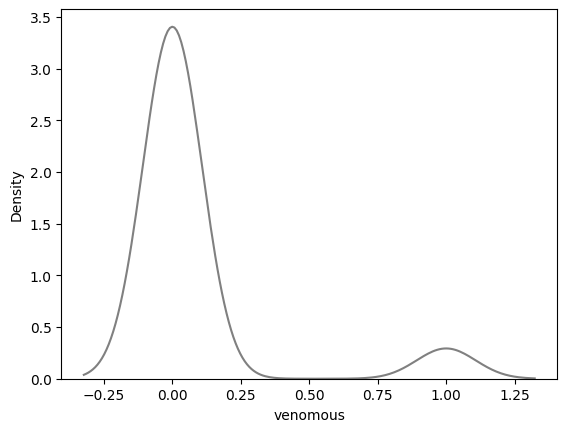

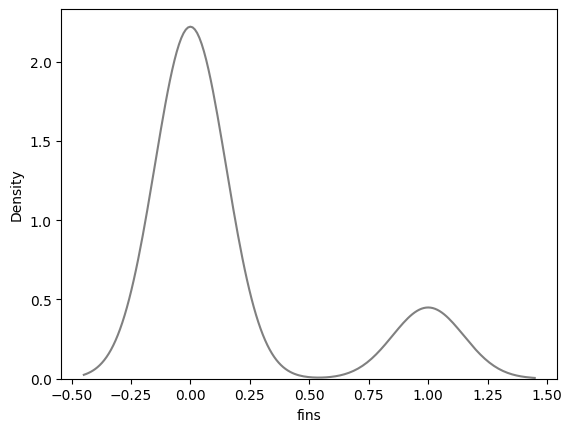

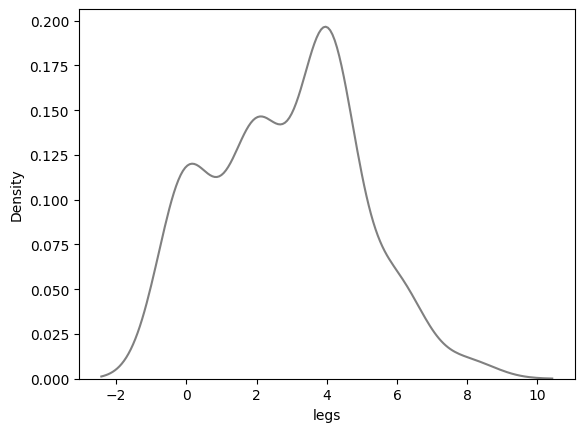

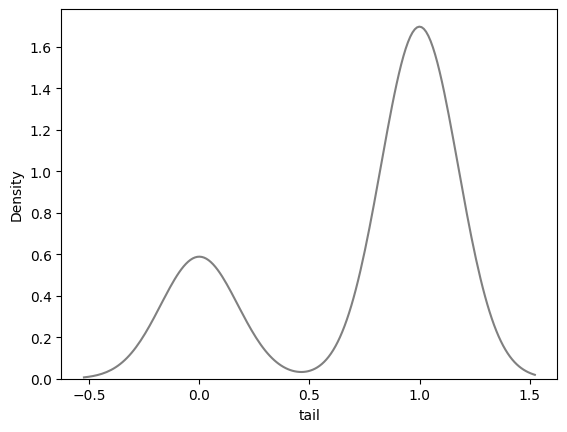

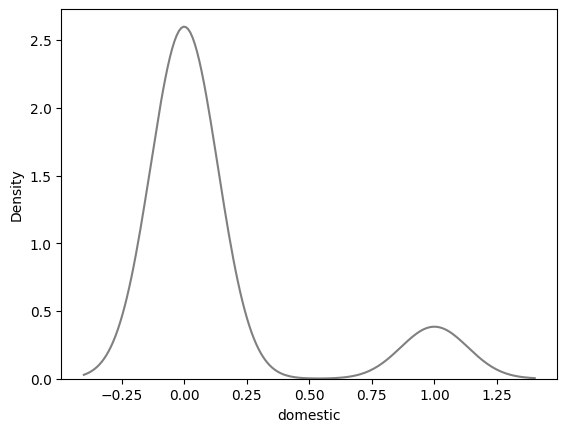

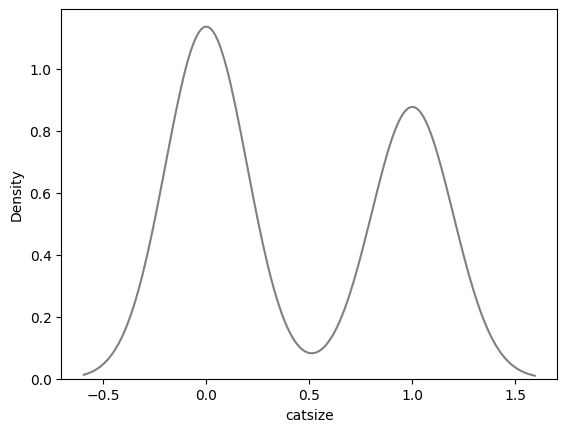

In [24]:
#kdeplot
feat=zoo.columns[1:-1]
for f in feat:
  sns.kdeplot(zoo[f],color='gray')
  plt.show()

# **BoxPlot**

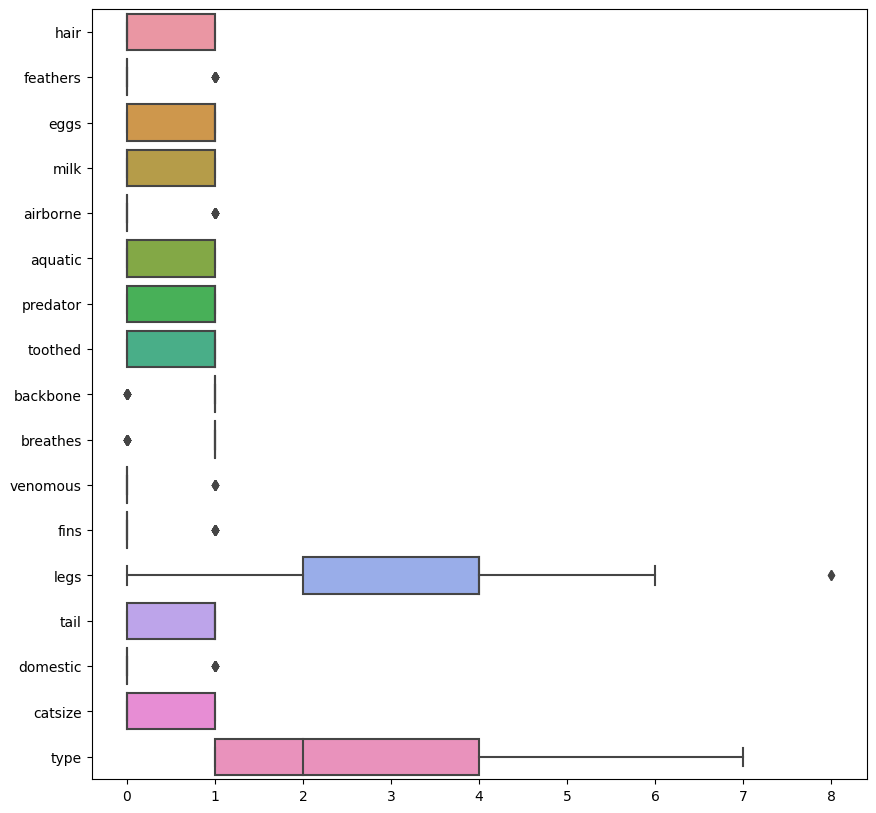

In [25]:
#boxplot
plt.figure(figsize=(10,10))
sns.boxplot(zoo,orient='h')
plt.show()

<Axes: xlabel='legs', ylabel='catsize'>

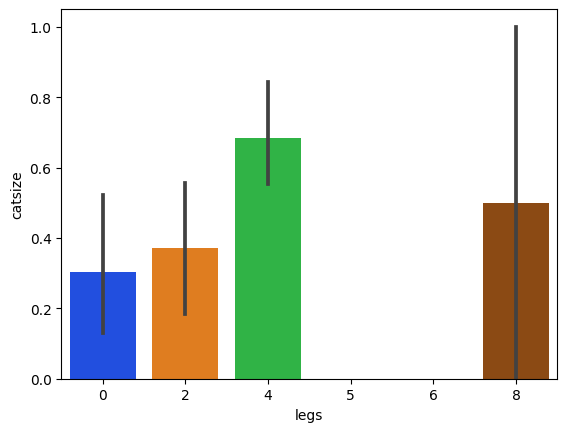

In [26]:
#barplot
sns.barplot(x='legs',y='catsize',data=zoo,palette='bright')

# **Features Encoding**

In [27]:
#As first the features is object base data so we have to perform Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
zoo['animal name']=le.fit_transform(zoo['animal name'])

In [30]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# **KNN Model Building**

In [31]:
#spliting into x and y
x=zoo.iloc[:,1:-1]
y=zoo.iloc[:,-1]

# **Spliting into Training and Testing**

In [32]:
#spliting into training and testing

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

In [35]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(70, 16)
(70,)
(31, 16)
(31,)


# **Building KNN model**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=13)

In [37]:
#using training and testing
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [38]:
print(confusion_matrix(ytest,ypred))

[[15  0  2  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 2  0  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  1  0  1  0]]


In [39]:
print(model.score(xtrain,ytrain))
print(model.score(xtest,ytest))

0.7714285714285715
0.8064516129032258


In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        17
           2       1.00      1.00      1.00         4
           4       0.57      1.00      0.73         4
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         2

    accuracy                           0.81        31
   macro avg       0.52      0.65      0.57        31
weighted avg       0.73      0.81      0.76        31



In [41]:
#accuracy is 81%

**cross validation**

In [42]:
from sklearn.model_selection import KFold,cross_val_score
k=KFold(n_splits=10,shuffle=True,random_state=11)
model1=KNeighborsClassifier(n_neighbors=17)

In [43]:
res=cross_val_score(model1,x,y,cv=k)
print(res)
print(res.mean())

[0.81818182 1.         0.9        0.7        0.7        0.8
 0.7        0.9        0.9        0.4       ]
0.781818181818182


In [44]:
#Accuracy we got is 78%

# **Grid Search for Algorithm tuning**

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
print(x)
print(y)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [47]:
#gridsearchcv
n=np.array(range(1,40))
params=dict(n_neighbors=n)
mod=KNeighborsClassifier()
grid=GridSearchCV(estimator=mod,param_grid=params)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [48]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [49]:
#Accuracy we got is 0.0.97 i.e 97% at k=1

# **Visualization of CV**

In [50]:
#searching for optimal k value

In [51]:
k_range=range(1,40)
k_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

In [52]:
k_scores

[0.9800000000000001,
 0.9400000000000001,
 0.95,
 0.9200000000000002,
 0.8809090909090909,
 0.8709090909090909,
 0.8418181818181818,
 0.8118181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7718181818181818,
 0.7418181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.6927272727272726,
 0.6436363636363637,
 0.5936363636363635,
 0.5936363636363635,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636]

In [53]:
zoo_scores=pd.DataFrame({'k values':range(1,40),'scores':k_scores})
zoo_scores

,k values,scores
0,1,0.980000
1,2,0.940000
2,3,0.950000
3,4,0.920000
4,5,0.880909
5,6,0.870909
6,7,0.841818
7,8,0.811818
8,9,0.781818
9,10,0.781818


In [54]:
zoo_scores.sort_values('scores',ascending=False)

,k values,scores
0,1,0.980000
2,3,0.950000
1,2,0.940000
3,4,0.920000
4,5,0.880909
5,6,0.870909
6,7,0.841818
7,8,0.811818
15,16,0.781818
21,22,0.781818


**Accuracy is more in k=1 and score=0.980000 i.e 98%**

In [55]:
#visualization
#plot accuracy score

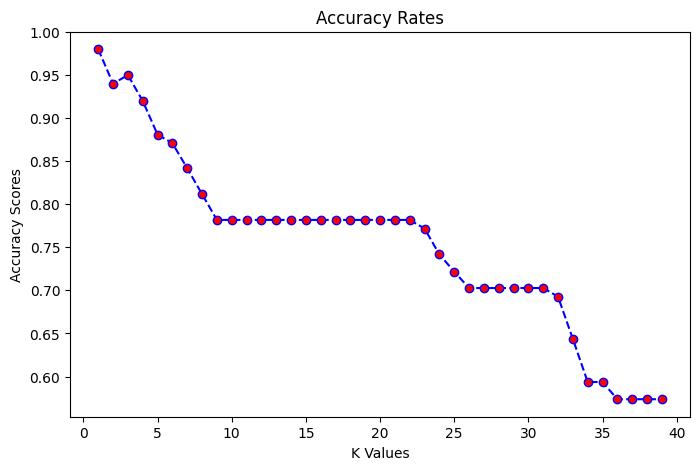

In [56]:
plt.figure(figsize=(8,5))
plt.plot(k_range,k_scores,color='blue',linestyle='--',marker='o',markerfacecolor='red')
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Rates')
plt.show()

In [57]:
#Here k=1 has highest accuracy

# **Error Rate**

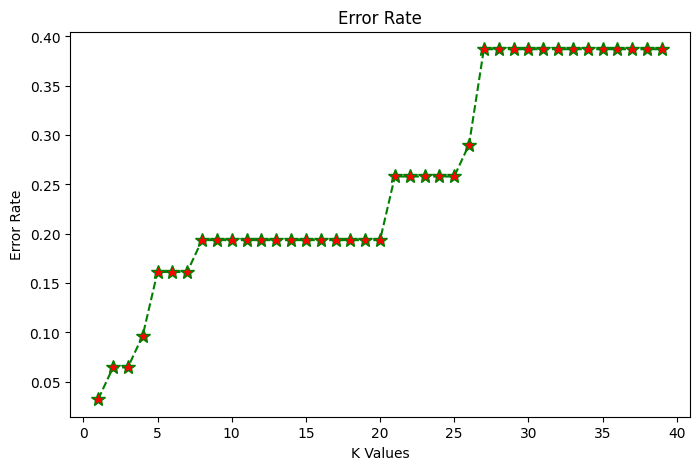

In [58]:
#Error Rate
error_rate=[]
for i in range(1,40):
  Knn=KNeighborsClassifier(n_neighbors=i)
  Knn.fit(xtrain,ytrain)
  ypred_i=Knn.predict(xtest)
  error_rate.append(np.mean(ytest!=ypred_i))


plt.figure(figsize=(8,5))
plt.plot(range(1,40),error_rate,color='green',linestyle='--',marker='*',markersize=10,markerfacecolor='red')
plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.title('Error Rate')
plt.show()

In [59]:
#Here k=1 has least error and here more accuracy is consider as k= (1 or 3) because after k=(1 or 3) the error started increasing/

In [60]:
#ploting traing accuracy and testing accuracy

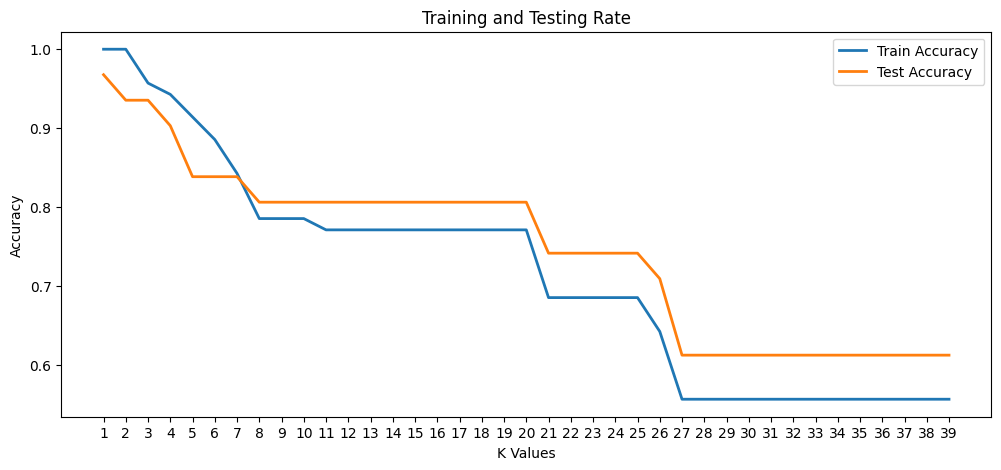

In [61]:
k_range=range(1,40)
train_accuracy=[]
test_accuracy=[]

for k in k_range:
  K=KNeighborsClassifier(n_neighbors=k)
  K.fit(xtrain,ytrain)
  train_accuracy.append(K.score(xtrain,ytrain))
  test_accuracy.append(K.score(xtest,ytest))

plt.figure(figsize=(12,5))
plt.plot(k_range,train_accuracy,label='Train Accuracy',linewidth=2)
plt.plot(k_range,test_accuracy,label='Test Accuracy',linewidth=2)
plt.xticks(range(1,40))
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Rate')
plt.show()

In [62]:
#In this training and testing accuracy plot, accuracy score is consider as k=1, because after k=1 the
#the graph is somewhat decrease and then stable.So k=1

In [63]:
#Building a knn model with k=1

In [64]:
model2=KNeighborsClassifier(n_neighbors=1)
fin_res=cross_val_score(model2,x,y,cv=10)
print(fin_res)
print(fin_res.mean())

[1.  1.  1.  1.  1.  1.  0.9 1.  1.  0.9]
0.9800000000000001


In [65]:
#Best Accuracy score is 0.9800000000000001 with k=1

**Accuracy score is 98%**

In [66]:
####completed///////

# **Completed**